### Red Wine Quality Predictions using Support Vector Machine (SVM)

In [33]:
#Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
pd.options.display.float_format = '{:.4f}'.format

In [34]:
#Read red wine data
redwine_df1 = pd.read_csv('winequality-red.csv', sep = ';')



In [35]:
#First 5 rows of red wine data
redwine_df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
1,7.8000,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
2,7.8000,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
3,11.2000,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
4,7.4000,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [36]:
# Check for missing values 
redwine_df1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
#Check proportions
redwine_df1.groupby(['quality']).size()/len(redwine_df1)

quality
3   0.0063
4   0.0331
5   0.4259
6   0.3990
7   0.1245
8   0.0113
dtype: float64

In [38]:
#Create a copy of red wine data
redwine_df2 = redwine_df1.copy()

In [39]:
#Data for Quality score 3,4 and 8 is very low. Just keep data for scores 5,6 and 7
redwine_df2 = redwine_df2[redwine_df2['quality'].isin([5,6,7])]
redwine_df2.groupby(['quality']).size()/len(redwine_df2)


quality
5   0.4486
6   0.4203
7   0.1311
dtype: float64

In [40]:
#redwine_df2 = redwine_df2.drop(['quality'], axis = 1)



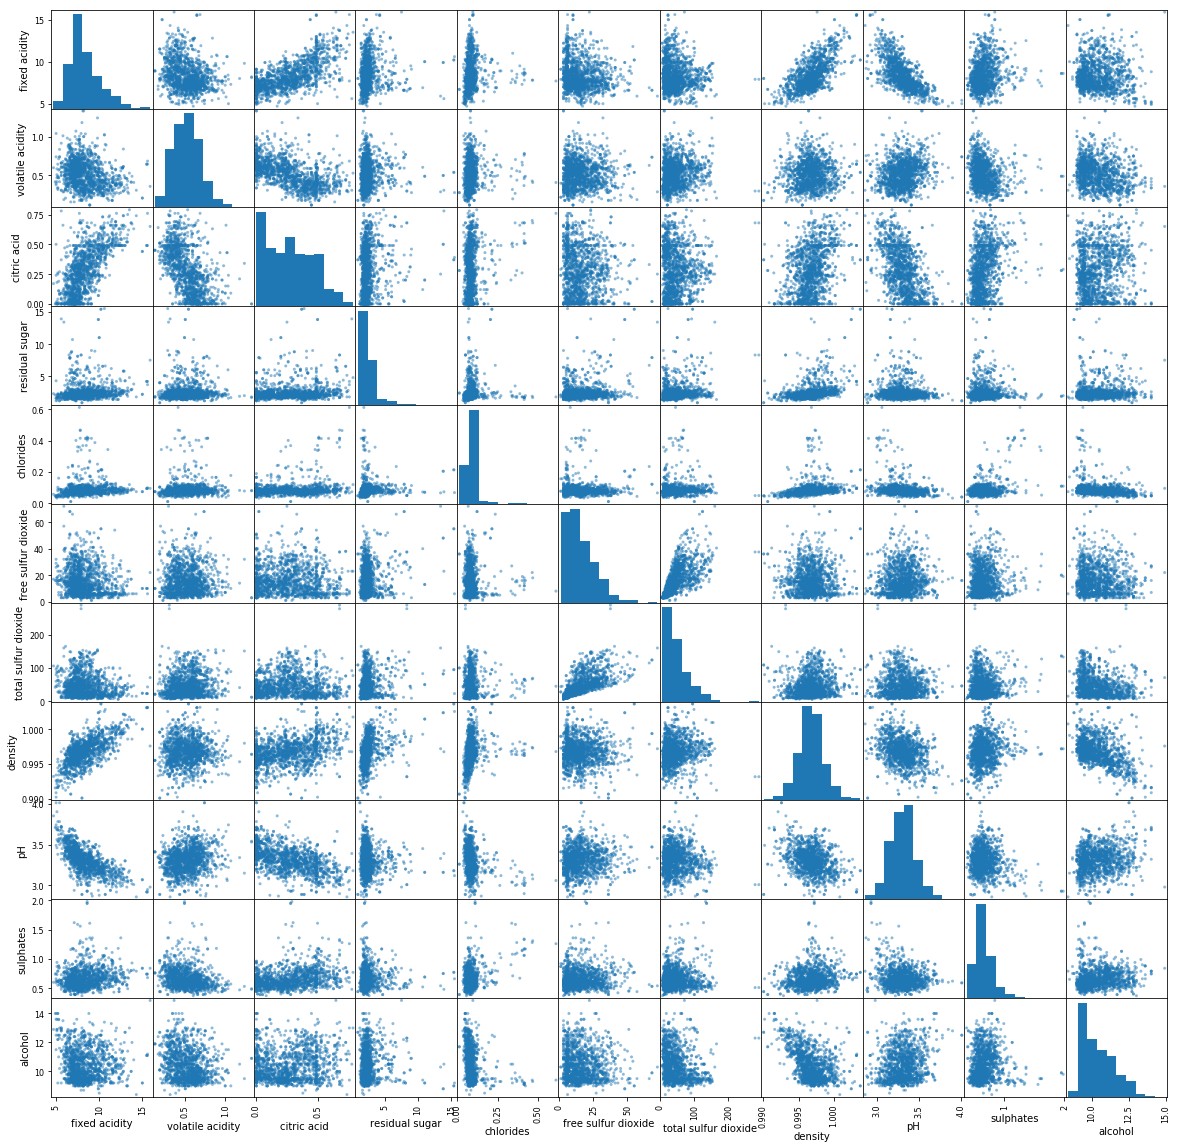

In [41]:
#Scatter plot to visualize correlations between the different metrics
scatter_matrix(redwine_df2.drop(['quality'], axis =1), figsize = (20,20))

plt.show()

In [42]:
#Check for multiollinearity
#Estimating variation inflation factors (VIF)
X = add_constant(redwine_df2)

pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])], index = X.columns)

const                  1783100.1262
fixed acidity                8.0455
volatile acidity             1.8294
citric acid                  3.0895
residual sugar               1.7470
chlorides                    1.4433
free sulfur dioxide          1.9793
total sulfur dioxide         2.2511
density                      6.5834
pH                           3.3335
sulphates                    1.4438
alcohol                      3.2220
quality                      1.5856
dtype: float64

In [43]:
#VIF tells us that fixed acidity and density suffers from high multicollinearity.
#Drop 'fixed acidity' first.
X = add_constant(redwine_df2.drop(['fixed acidity'], axis =1))

pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])], index = X.columns)

const                  694042.3143
volatile acidity            1.8257
citric acid                 2.7601
residual sugar              1.4093
chlorides                   1.3742
free sulfur dioxide         1.9605
total sulfur dioxide        2.1527
density                     2.4420
pH                          1.5770
sulphates                   1.4103
alcohol                     2.3447
quality                     1.5754
dtype: float64

In [44]:
#Removing fixed acidity reduced VIF considerably over all. 
#Check if removing density would do the same.

X = add_constant(redwine_df2.drop(['density'], axis =1))
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])], index = X.columns)


const                  1492.1597
fixed acidity             2.9843
volatile acidity          1.8002
citric acid               3.0893
residual sugar            1.1138
chlorides                 1.4322
free sulfur dioxide       1.9673
total sulfur dioxide      2.2427
pH                        2.2027
sulphates                 1.3553
alcohol                   1.5458
quality                   1.5770
dtype: float64

In [45]:
#Remving fixed acidity.
#VIF is lower when fixed acidity is removed fro the data
redwine_df2 = redwine_df2.drop(['fixed acidity'], axis = 1)

In [46]:
#Check the first five rows of the data
redwine_df2.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5
1,0.8800,0.0000,2.6000,0.0980,25.0000,67.0000,0.9968,3.2000,0.6800,9.8000,5
2,0.7600,0.0400,2.3000,0.0920,15.0000,54.0000,0.9970,3.2600,0.6500,9.8000,5
3,0.2800,0.5600,1.9000,0.0750,17.0000,60.0000,0.9980,3.1600,0.5800,9.8000,6
4,0.7000,0.0000,1.9000,0.0760,11.0000,34.0000,0.9978,3.5100,0.5600,9.4000,5


In [47]:
#No. of observations
redwine_df2.shape[0]

1518

In [48]:
#Create seperate array of values for all metrics and the target (quality)
X,Y = redwine_df2, redwine_df2['quality']

X,Y = X.values, Y.values



In [49]:
#Split data to train (70%) and test (30%)
#Date is imbalanced with unequal proortions of target data (Quality)
#Set stratify as "True"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30,
                                                    random_state = 42,
                                                    stratify=Y)



In [50]:
#No. of observation in train data
X_train.shape, Y_train.shape

((1062, 11), (1062,))

In [51]:
#No. of observations in test data
X_test.shape, Y_test.shape

((456, 11), (456,))

In [52]:
#Standardize features by removing the mean and scaling to unit variance
scalar = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scalar.transform(X_train)



In [57]:
#Support vector machines for classification
clf = svm.SVC(C=100, gamma = 0.001, random_state = 42).fit(X_train_transformed, Y_train)
#Set scroring- using precision and recall
scoring = ['precision_macro', 'recall_macro']

#5 fold cross validation
scores = cross_validate(clf, X, Y, scoring = scoring, cv = 5, return_train_score = False)

sorted(scores.keys())

#Recall scores
scores['test_recall_macro']    

array([0.98958333, 0.978125  , 0.99479167, 0.98333333, 0.99475066])

In [58]:
#Precision scores
scores['test_precision_macro']    

array([0.99054374, 0.98996075, 0.98412698, 0.99483204, 0.99516908])

#### Reference
- http://scikit-learn.org/stable/modules/cross_validation.html